In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Explicit Euler Method

In [10]:
def my_forward_euler(ds, t_span, s0):
    h = .1                            # assume h = 1/10
    t = t_span
    s = np.zeros(len(t))
    s[0] = s0

    for i in range(0, len(t) - 1):
        s[i + 1] = s[i] + h*f(t[i], s[i])
        
    return [t, s]

t_span = np.linspace(0, 1, 10)
s0 = 1

f = lambda t, s: t*np.exp(-s)

t_eul, s_eul = my_forward_euler(f, t_span, s0)

print('t values are: \n',t_eul)
print('\n s values are: \n', s_eul)

t values are: 
 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]

 s values are: 
 [1.         1.         1.00408755 1.0122293  1.0243429  1.04029989
 1.05993037 1.08302903 1.10936214 1.13867496]


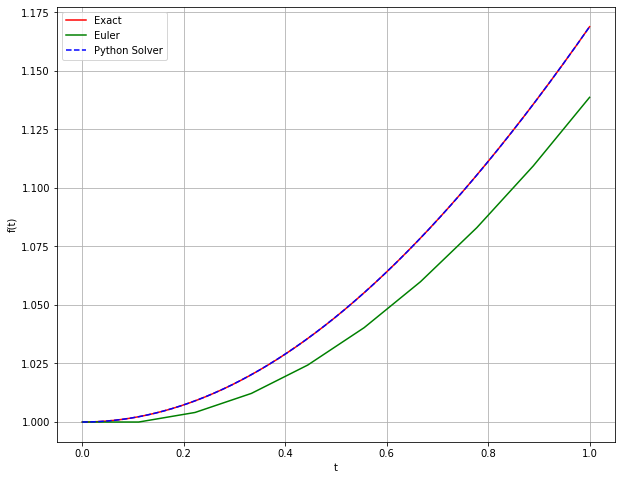

In [11]:
plt.figure(figsize = (10, 8))

# Exact solution
t = np.linspace(0, 1, 1000)
s = np.log(np.exp(s0) + (t**2-t[0])/2)
plt.plot(t, s, 'r', label='Exact')

# Forward Euler
plt.plot(t_eul, s_eul, 'g', label='Euler')

# Python solver
sol = solve_ivp(f, [0, 1], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], 'b--', \
         label='Python Solver')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc=2)
plt.show()

## Fourth Order Runge-Kutta

The function `myRK4(ds,tspan,s0)`, take `tspan`, an array of times for which numerical solutions of the differential equation are desired, and `s0` the initial condition of the system, in as arguments. The function `myRK4` uses the fourth-order Runge-Kutta method to numerically approximate the solution to `ds`, the given ordinary differential equation, in terms of `t` and `s`, which are the time values and output values at each time, respectively. 

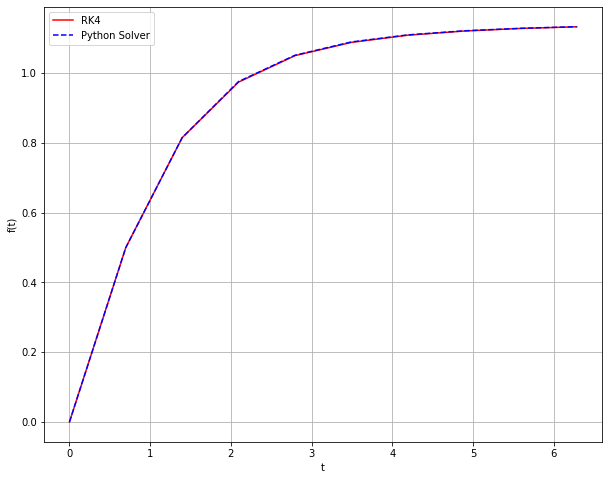

In [5]:
def myRK4(ds, t_span, s0): 
    h    = t_span[1] - t_span[0]    # h = 0.6981317007977318
    N    = len(t_span)
    s    = np.zeros(N)
    t    = t_span
    s0   = s[0]
    for n in range(0,N-1):
        k1 = ds(t[n], s[n])
        k2 = ds(t[n] + h/2., s[n] + k1*h/2.)
        k3 = ds(t[n] + h/2., s[n] + k2*h/2.)
        k4 = ds(t[n] + h, s[n] + k3*h)
        t[n+1] = t[n] + h
        s[n+1] = s[n] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return [t, s]

f = lambda t, s: np.sin(np.exp(s))/(t+1)
t_span = np.linspace(0, 2*np.pi, 10)
s0 = 0


plt.figure(figsize = (10, 8))

# Runge-Kutta method
t, s = myRK4(f, t_span, s0)
plt.plot(t, s, 'r', label='RK4')


from scipy.integrate import solve_ivp

# Python solver
sol = solve_ivp(f, [0, 2*np.pi], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], \
         'b--', label='Python Solver')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc=2)
plt.show()